In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt

In [2]:
df=pd.read_csv('data/secondary_data.csv',sep=';')
print(df)

      class  cap-diameter cap-shape cap-surface cap-color  \
0         p         15.26         x           g         o   
1         p         16.60         x           g         o   
2         p         14.07         x           g         o   
3         p         14.17         f           h         e   
4         p         14.64         x           h         o   
...     ...           ...       ...         ...       ...   
61064     p          1.18         s           s         y   
61065     p          1.27         f           s         y   
61066     p          1.27         s           s         y   
61067     p          1.24         f           s         y   
61068     p          1.17         s           s         y   

      does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                        f               e          NaN          w   
1                        f               e          NaN          w   
2                        f               e          NaN  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [4]:
df.dtypes

class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

In [5]:
df.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


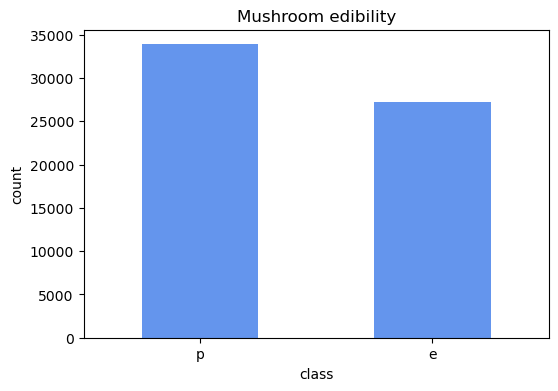

In [10]:
plt.figure(figsize=(6,4))
pd.value_counts(df['class']).plot.bar()
plt.xlabel('class')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.title('Mushroom edibility')
plt.show()

In [7]:
df.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [8]:
import seaborn as sns 
sns.set_palette(sns.color_palette(['cornflowerblue','darkorange']))

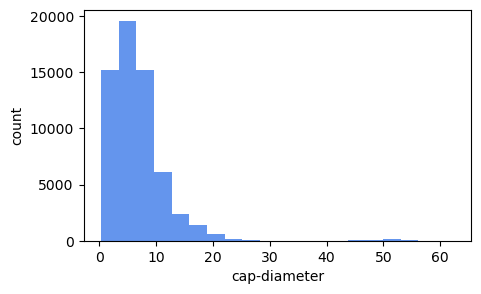

In [9]:
plt.figure(figsize=(5,3))

df['cap-diameter'].plot.hist(bins=20) 
plt.xlabel('cap-diameter')
plt.ylabel('count')
plt.show()

<Axes: xlabel='cap-diameter', ylabel='Count'>

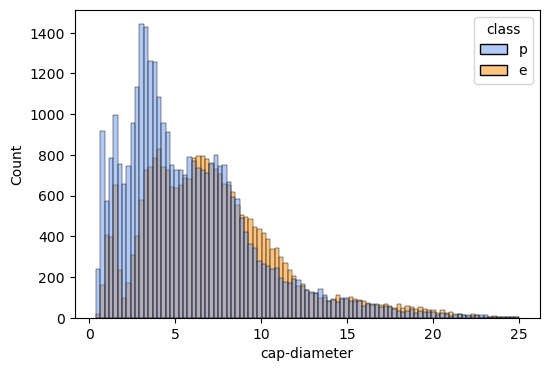

In [10]:
f, ax = plt.subplots(figsize=(6,4))
x_capdia=df[df['cap-diameter']<25]
sns.histplot(x='cap-diameter', data = x_capdia, hue='class')

<Axes: xlabel='stem-height', ylabel='Count'>

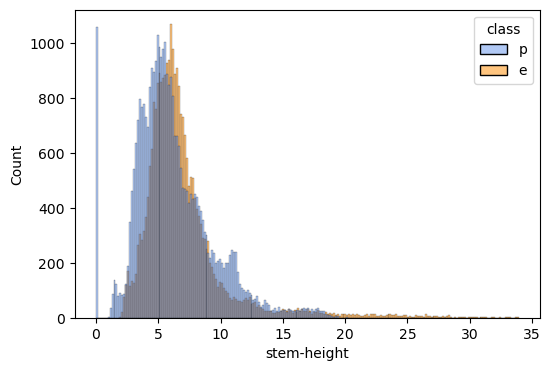

In [11]:
f, ax = plt.subplots(figsize=(6,4))
sns.histplot(x='stem-height', data = df, hue='class')

<Axes: xlabel='stem-width', ylabel='Count'>

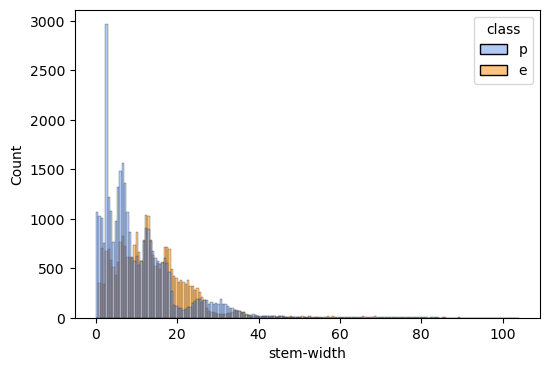

In [12]:
f, ax = plt.subplots(figsize=(6,4))
sns.histplot(x='stem-width', data = df, hue='class')

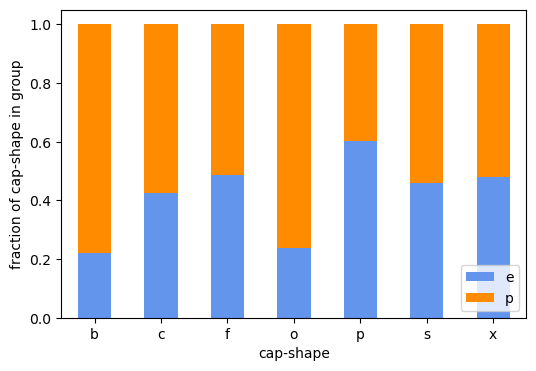

In [13]:
count_matrix = df.groupby(['cap-shape', 'class']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(6,4))
plt.xticks(rotation=0)
plt.ylabel('fraction of cap-shape in group')
plt.legend(loc=4)
plt.show()

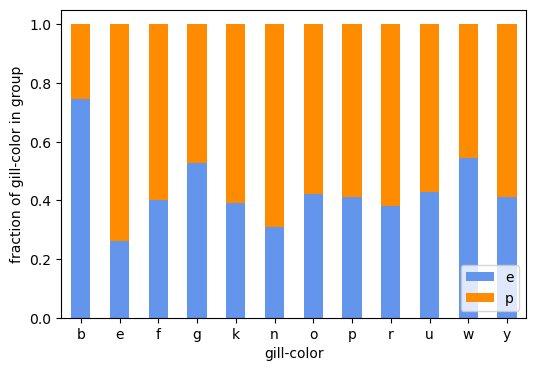

In [14]:
count_matrix = df.groupby(['gill-color', 'class']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(6,4))
plt.xticks(rotation=0)
plt.ylabel('fraction of gill-color in group')
plt.legend(loc=4)
plt.show()

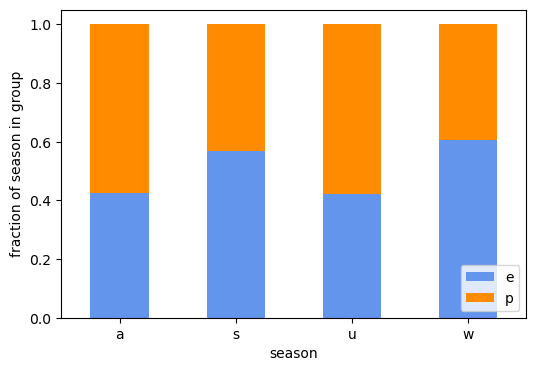

In [15]:
count_matrix = df.groupby(['season', 'class']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(6,4))
plt.xticks(rotation=0)
plt.ylabel('fraction of season in group')
plt.legend(loc=4)
plt.show()

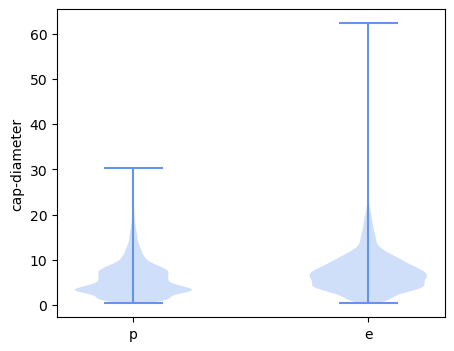

In [16]:
dataset = [df[df['class']=='p']['cap-diameter'].values,
           df[df['class']=='e']['cap-diameter'].values]

plt.figure(figsize=(5,4))

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['p','e'])
plt.ylabel('cap-diameter')
plt.show()

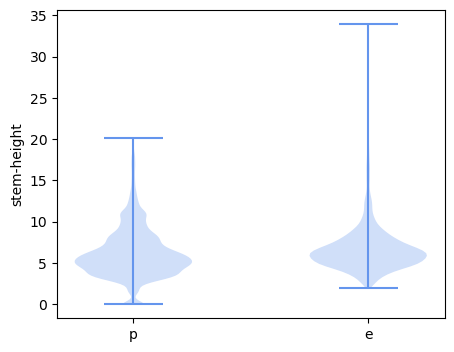

In [17]:
dataset = [df[df['class']=='p']['stem-height'].values,
           df[df['class']=='e']['stem-height'].values]

plt.figure(figsize=(5,4))

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['p','e'])
plt.ylabel('stem-height')
plt.show()

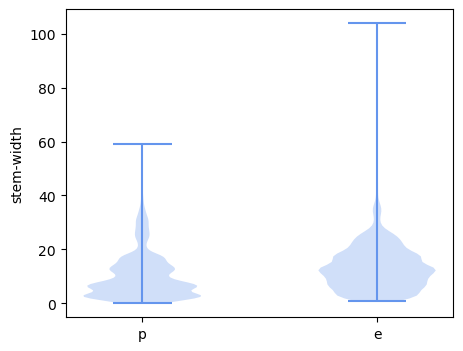

In [18]:
dataset = [df[df['class']=='p']['stem-width'].values,
           df[df['class']=='e']['stem-width'].values]

plt.figure(figsize=(5,4))

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['p','e'])
plt.ylabel('stem-width')
plt.show()

In [19]:
y=df['class']
print(y.value_counts())

class
p    33888
e    27181
Name: count, dtype: int64


In [20]:
from sklearn.model_selection import train_test_split

X=df.drop(columns=['class'])

random_state = 4
X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state=random_state)

print('training set of y:',np.unique(y_train,return_counts=True))
print('validation set of y:',np.unique(y_val,return_counts=True))
print('test set of y:',np.unique(y_test,return_counts=True))

print('training set of X:',X_train.shape)
print('validation set of X:',X_val.shape)
print('test set of X:',X_test.shape)

training set of y: (array(['e', 'p'], dtype=object), array([16260, 20381], dtype=int64))
validation set of y: (array(['e', 'p'], dtype=object), array([5404, 6810], dtype=int64))
test set of y: (array(['e', 'p'], dtype=object), array([5517, 6697], dtype=int64))
training set of X: (36641, 20)
validation set of X: (12214, 20)
test set of X: (12214, 20)


In [21]:
print('data dimensions:',df.shape)
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(df[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (61069, 21)
fraction of missing values in features:
cap-surface          0.231214
gill-attachment      0.161850
gill-spacing         0.410405
stem-root            0.843931
stem-surface         0.624277
veil-type            0.947977
veil-color           0.878613
ring-type            0.040462
spore-print-color    0.895954
dtype: float64
data types of the features with missing values:
cap-surface          object
gill-attachment      object
gill-spacing         object
stem-root            object
stem-surface         object
veil-type            object
veil-color           object
ring-type            object
spore-print-color    object
dtype: object
fraction of points with missing values: 1.0


In [22]:
X.drop(columns=['cap-diameter', 'stem-height', 'stem-width']).columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
       'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root',
       'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring',
       'ring-type', 'spore-print-color', 'habitat', 'season'],
      dtype='object')

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

print('Before preprocessing:',X.shape)

random_state = 42
cat_ftrs = X.drop(columns=['cap-diameter', 'stem-height', 'stem-width']).columns
num_ftrs=['cap-diameter', 'stem-height', 'stem-width']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_ftrs),
        ('cat', categorical_transformer, cat_ftrs)])

X_prep = preprocessor.fit_transform(X_train)
# the feature names after fit
feature_names = preprocessor.get_feature_names_out()

df_train = pd.DataFrame(data=X_prep,columns=feature_names)
print('After preprocessing:')
print(df_train.shape)

# transform the val
df_val = preprocessor.transform(X_val)
df_val = pd.DataFrame(data=df_val,columns = feature_names)
print(df_val.shape)

# transform the test
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test,columns = feature_names)
print(df_test.shape)
print(feature_names)

Before preprocessing: (61069, 20)
After preprocessing:
(36641, 128)
(12214, 128)
(12214, 128)
['num__cap-diameter' 'num__stem-height' 'num__stem-width'
 'cat__cap-shape_b' 'cat__cap-shape_c' 'cat__cap-shape_f'
 'cat__cap-shape_o' 'cat__cap-shape_p' 'cat__cap-shape_s'
 'cat__cap-shape_x' 'cat__cap-surface_d' 'cat__cap-surface_e'
 'cat__cap-surface_g' 'cat__cap-surface_h' 'cat__cap-surface_i'
 'cat__cap-surface_k' 'cat__cap-surface_l' 'cat__cap-surface_missing'
 'cat__cap-surface_s' 'cat__cap-surface_t' 'cat__cap-surface_w'
 'cat__cap-surface_y' 'cat__cap-color_b' 'cat__cap-color_e'
 'cat__cap-color_g' 'cat__cap-color_k' 'cat__cap-color_l'
 'cat__cap-color_n' 'cat__cap-color_o' 'cat__cap-color_p'
 'cat__cap-color_r' 'cat__cap-color_u' 'cat__cap-color_w'
 'cat__cap-color_y' 'cat__does-bruise-or-bleed_f'
 'cat__does-bruise-or-bleed_t' 'cat__gill-attachment_a'
 'cat__gill-attachment_d' 'cat__gill-attachment_e'
 'cat__gill-attachment_f' 'cat__gill-attachment_missing'
 'cat__gill-attachment_p

In [24]:
df_prep=pd.concat([df_train,df_val,df_test])
print(df_prep.isnull().sum())

num__cap-diameter    0
num__stem-height     0
num__stem-width      0
cat__cap-shape_b     0
cat__cap-shape_c     0
                    ..
cat__habitat_w       0
cat__season_a        0
cat__season_s        0
cat__season_u        0
cat__season_w        0
Length: 128, dtype: int64


In [25]:
pearson = X[['cap-diameter', 'stem-height', 'stem-width']].corr(method='pearson', min_periods=1, numeric_only=False)
pearson

,cap-diameter,stem-height,stem-width
cap-diameter,1.00000,0.422560,0.695330
stem-height,0.42256,1.000000,0.436117
stem-width,0.69533,0.436117,1.000000


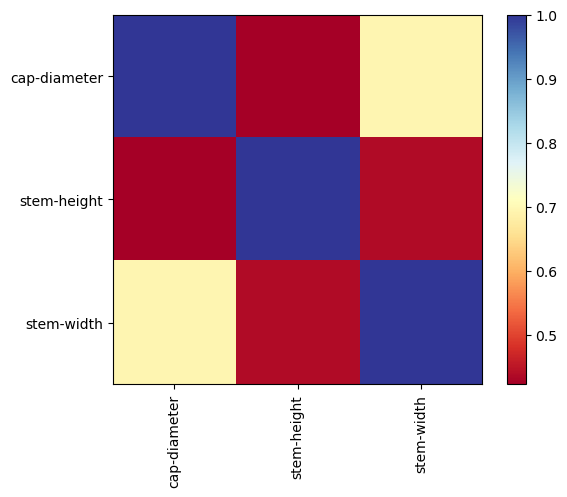

<Figure size 600x400 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt
plt.imshow(pearson, cmap ="RdYlBu") 
plt.colorbar() 
plt.xticks(range(len(pearson)), pearson.columns,rotation=90) 
plt.yticks(range(len(pearson)), pearson.index) 
plt.figure(figsize=(6,4))
plt.show()